In [1]:
import sys
import os
import matplotlib
import matplotlib.pyplot as plt


sys.path.append(r"C:\Users\pgrover\Documents\code\pymorph")
import weno_morph_model as wmm
import schemes.weno as weno
import numpy as np
from scipy.signal import savgol_filter
import sediment_transport.sed_trans as st
%load_ext cython
%matplotlib inline
%load_ext autoreload
%autoreload 2

# 2018-12-12 Paper 1 Modelling

In [2]:
D50 = 0.25/1000.
model = wmm.UpwindMorphologicalModel(D50)
casefolder = r'c:\Users\pgrover\Dropbox\PhD\Papers\Paper 1 - Application of OpenFoam to simulate the flow over fixed dunes\geometry'
bed_filepath = os.path.join(casefolder, 'modified_flume_profile_plus0.05_v001.txt')
zbed, xc, dx = wmm.load_bed_profile(bed_filepath)

['ncols', '1']
['nrows', '194']
['xllcorner', '0']
['yllcorner', '0']
['cellsize', '0.002']
['NODATA_value', '-9999']


## 6 cm flow depth

### LS Model Run

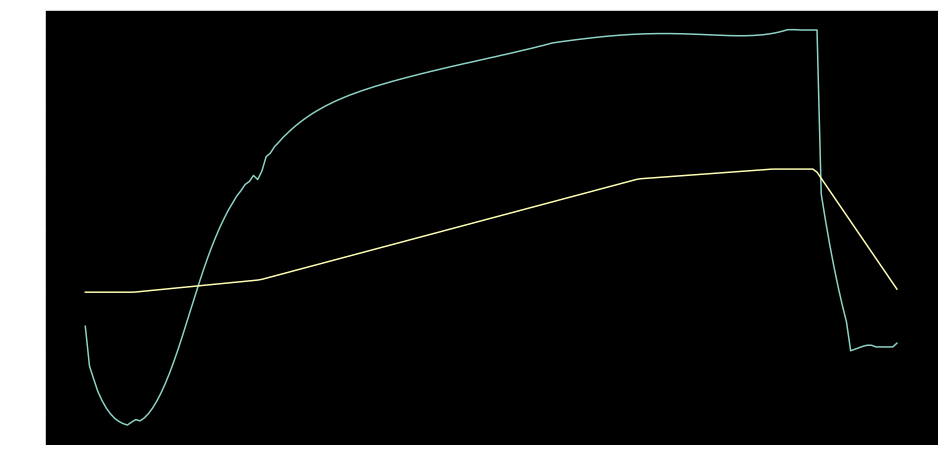

In [3]:
bed_shear_filepath = os.path.join(casefolder,'6cm', 'ke_shear.txt')
bed_shear_stress = wmm.load_bed_shear_stress(bed_shear_filepath)
plt.figure(figsize=[16,8])
plt.style.use('dark_background')
plt.plot(xc,bed_shear_stress/10.)
plt.plot(xc, zbed)


 Starting simulation....
Number of time steps: 40
Grid dx = 0.002
Grid nx = 194
D50:    0.00025
Rho Particle:    2650.0
Angle Repose Degrees:    30.0
Max Shear Stress:    0.426469267
qbedload shape: (194,)
Max qbedload = 1.207526117331331e-06
 Done
 ----------------------------


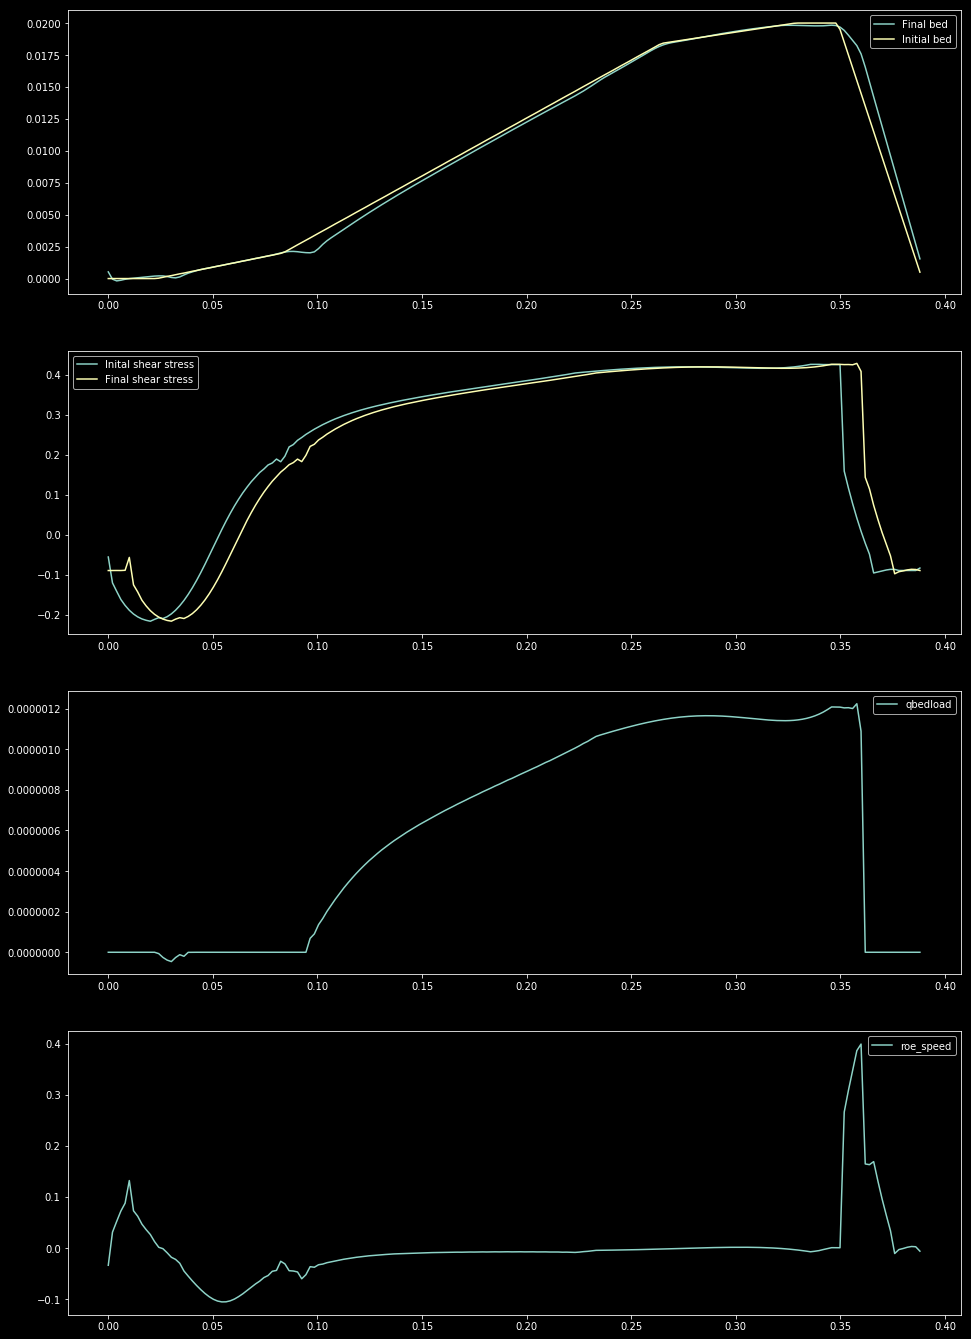

In [44]:
model = None
bed_shear_filepath = os.path.join(casefolder,'6cm', 'ke_shear.txt')
bed_shear_stress = wmm.load_bed_shear_stress(bed_shear_filepath)

model = wmm.UpwindMorphologicalModel(D50)
model.setup_model(bed_shear_stress.copy(), zbed.copy(), xc, dx,useSmoother=True, adjustment_angle=28.)
simulationTime = 40
dt = 1

zc_kwsst_12cm, qbedload, bedShear, roe_speed = model.run_model(simulationTime, 
                                                             dt=dt, 
                                                             useSlopeAdjust=False)

fig, axs = plt.subplots(4,1, figsize=[16,24])
plt.style.use('dark_background')
axs[0].plot(xc, zc_kwsst_12cm, label='Final bed')
axs[0].plot(xc, zbed, label='Initial bed')
#axs[0].set_xlim([0.075, 0.125])
axs[0].legend()

axs[1].plot(xc, bed_shear_stress, label='Inital shear stress')
axs[1].plot(xc, bedShear, label='Final shear stress')
#axs[1].set_xlim([0.075, 0.125])
axs[1].legend()

axs[2].plot(xc, qbedload, label='qbedload')
axs[2].legend()

axs[3].plot(xc, bedShear-bed_shear_stress, label='roe_speed')
axs[3].legend()

 Starting simulation....
Number of time steps: 40
Grid dx = 0.002
Grid nx = 194
D50:    0.00025
Rho Particle:    2650.0
Angle Repose Degrees:    30.0
Max Shear Stress:    0.383065899
qbedload shape: (194,)
Max qbedload = 9.213835802087987e-07
 Done
 ----------------------------


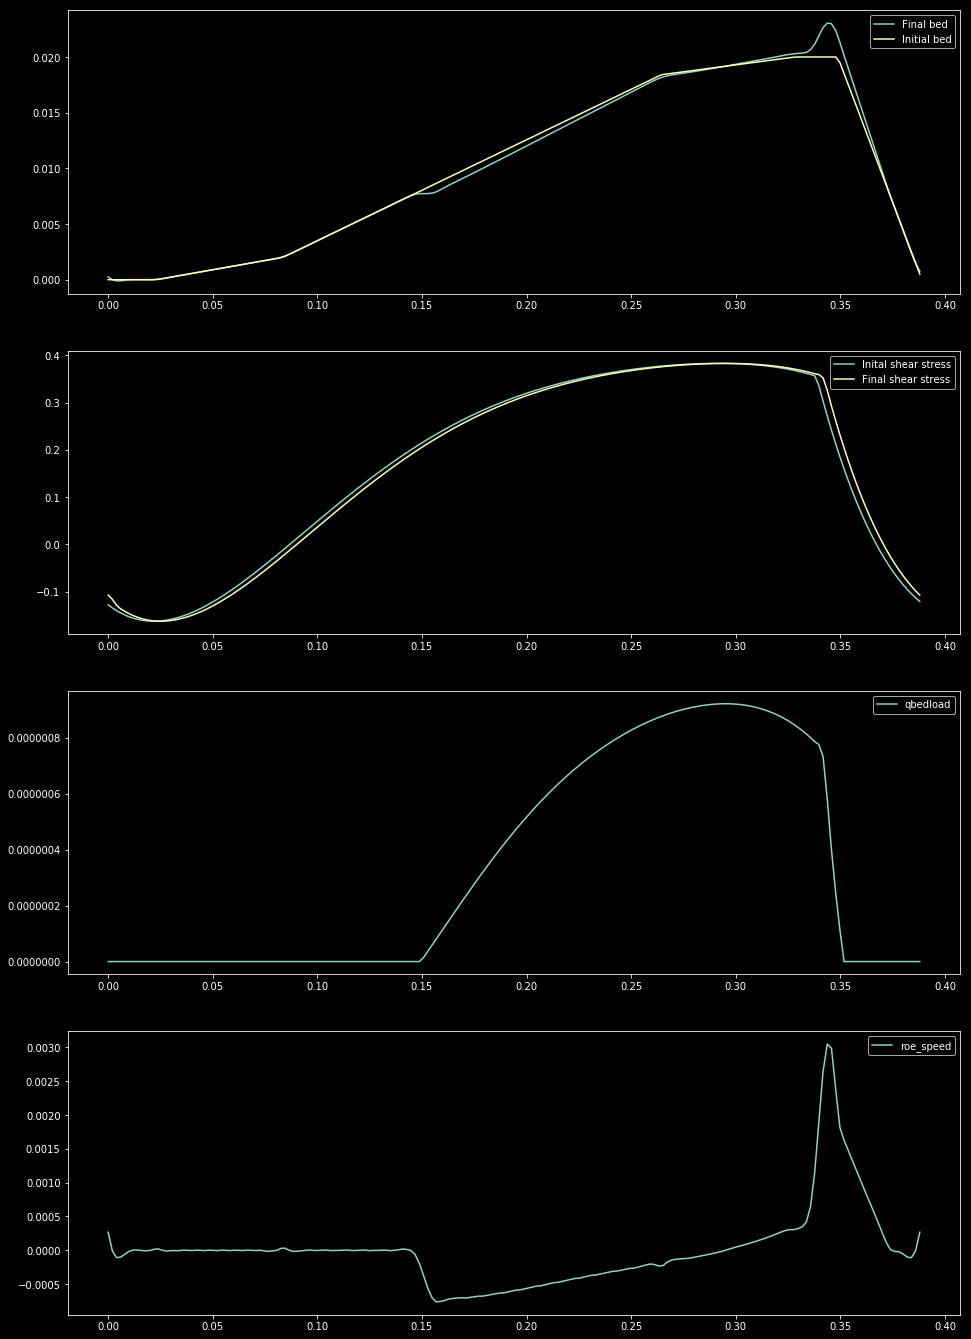

In [43]:
xmodel = None
bed_shear_filepath = os.path.join(casefolder,'6cm', 'kwsst_shear.txt')
bed_shear_stress = wmm.load_bed_shear_stress(bed_shear_filepath)

model = wmm.UpwindMorphologicalModel(D50)
model.setup_model(bed_shear_stress.copy(), zbed.copy(), xc, dx,useSmoother=True, adjustment_angle=28.)
simulationTime = 40
dt = 1

zc_kwsst_12cm, qbedload, bedShear, roe_speed = model.run_model(simulationTime, 
                                                             dt=dt, 
                                                             useSlopeAdjust=False)

fig, axs = plt.subplots(4,1, figsize=[16,24])
plt.style.use('dark_background')
axs[0].plot(xc, zc_kwsst_12cm, label='Final bed')
axs[0].plot(xc, zbed, label='Initial bed')
#axs[0].set_xlim([0.075, 0.125])
axs[0].legend()

axs[1].plot(xc, bed_shear_stress, label='Inital shear stress')
axs[1].plot(xc, bedShear, label='Final shear stress')
#axs[1].set_xlim([0.075, 0.125])
axs[1].legend()

axs[2].plot(xc, qbedload, label='qbedload')
axs[2].legend()

axs[3].plot(xc, zc_kwsst_12cm-zbed, label='roe_speed')
axs[3].legend()

 Starting simulation....
Number of time steps: 12
Grid dx = 0.002
Grid nx = 194
D50:    0.00025
Rho Particle:    2650.0
Angle Repose Degrees:    30.0
Max Shear Stress:    0.383065899
qbedload shape: (194,)
Max qbedload = 9.213835802087987e-07
 Done
 ----------------------------


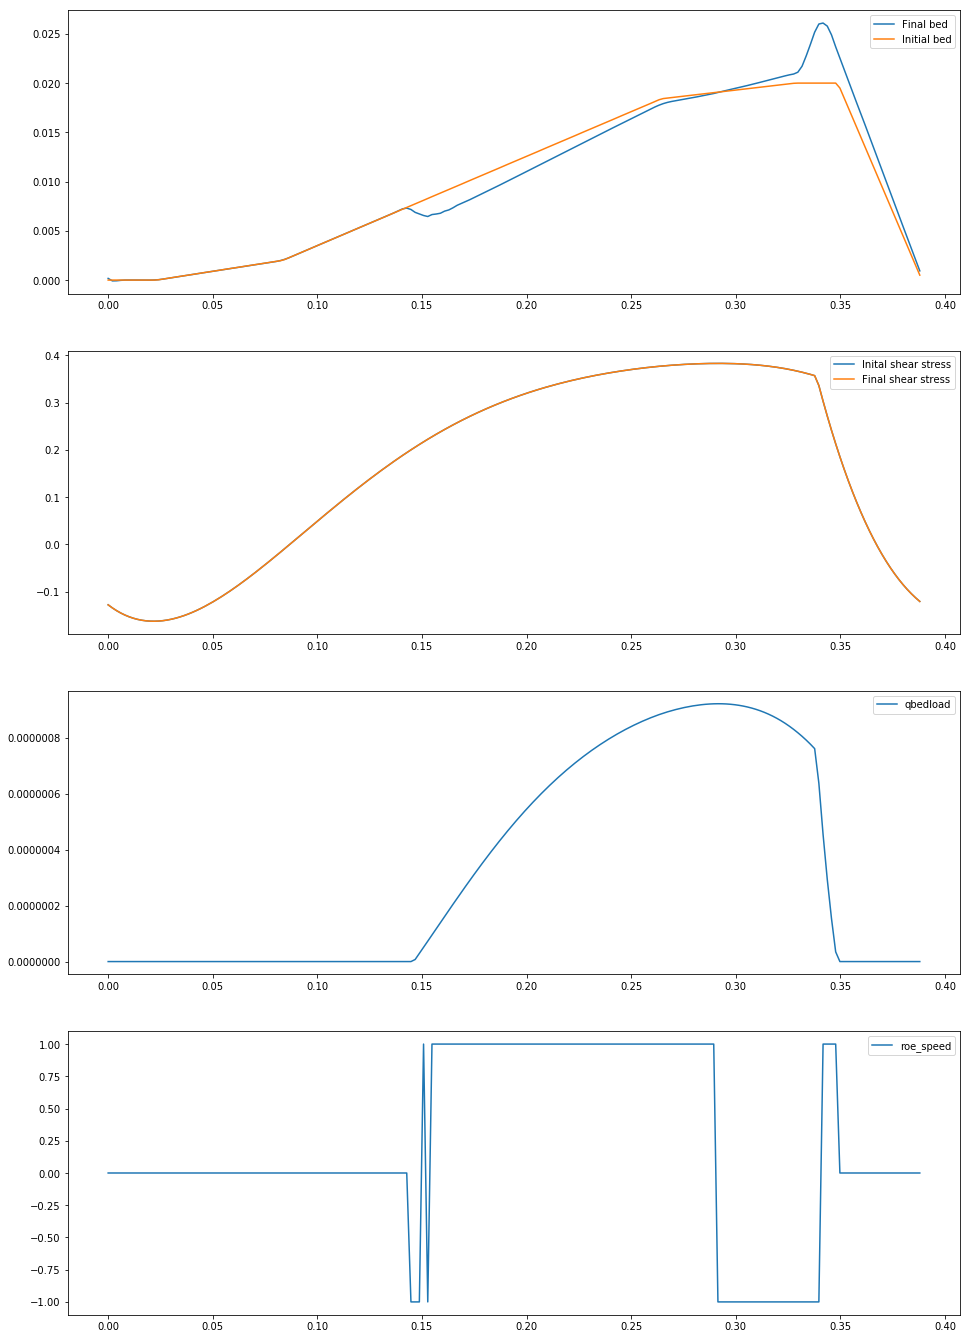

In [5]:
bed_shear_filepath = os.path.join(casefolder,'6cm', 'kwsst_shear.txt')
bed_shear_stress = wmm.load_bed_shear_stress(bed_shear_filepath)
model = wmm.UpwindMorphologicalModel(D50)
model.setup_model(bed_shear_stress, zbed, xc, dx,useSmoother=True, adjustment_angle=20.)
simulationTime = 120
dt = 10

zc_kwsst_12cm, qbedload, bedShear, roe_speed = model.run_model(simulationTime, 
                                                             dt=dt, 
                                                             useSlopeAdjust=False)

fig, axs = plt.subplots(4,1, figsize=[16,24])
axs[0].plot(xc, zc_kwsst_12cm, label='Final bed')
axs[0].plot(xc, zbed, label='Initial bed')
axs[0].legend()

axs[1].plot(xc, bed_shear_stress, label='Inital shear stress')
axs[1].plot(xc, bedShear, label='Final shear stress')
axs[1].legend()

axs[2].plot(xc, qbedload, label='qbedload')
axs[2].legend()

axs[3].plot(xc, roe_speed, label='roe_speed')
axs[3].legend()